# 🚀 Day 5 Challenge

## "University Rankings – Exploring Education Excellence"
* Dataset: https://www.kaggle.com/datasets/mylesoneill/world-university-rankings

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [8]:
df = pd.read_csv("world_university_rankings.csv")
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# Pandas

## Data Cleaning
## Task 1: Check for missing values across all columns. Decide how to handle them—e.g., drop rows with missing scores or impute them if possible.

In [27]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [35]:
df['broad_impact'].skew()

0.007745942267872616

In [37]:
df['broad_impact'] = df['broad_impact'].fillna(df['broad_impact'].mean())

## Creating Rank Bands
## Task 2 : Create a new column Rank Band that classifies universities into:
* Top 100 (world_rank ≤ 100),
* Top 500 (101–500),
* Top 1000 (501–1000),
* Above 1000 (world_rank > 1000).

In [54]:
def rank_band_cat(col):
    if col > 1000:
        return "Above 1000"
    elif col <= 1000 and col > 500:
        return "Top 1000"
    elif col <= 500 and col > 100:
        return "Top 500"
    else:
        return "Top 100"

df['rank_band'] = df['world_rank'].apply(rank_band_cat)
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,rank_band
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012,Top 100
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012,Top 100
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012,Top 100
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012,Top 100
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012,Top 100


## Country-wise Aggregation
## Task 3: Group the data by country and compute the average score and number of universities listed for each country.

In [62]:
grouped_df = df.groupby('country').agg(
    avg_score = ('score', 'mean'), 
    institution_count = ('institution', 'count')).reset_index()
grouped_df

,country,avg_score,institution_count
0,Argentina,44.672857,7
1,Australia,45.825517,58
2,Austria,45.139583,24
3,Belgium,47.011000,20
4,Brazil,44.781111,36
5,Bulgaria,44.335000,2
6,Canada,47.359306,72
7,Chile,44.767500,8
8,China,44.992575,167
9,Colombia,44.432500,4


# 📊 Visualization 

## 1: Top Countries by Average Score
## Task: Bar chart of top 10 countries based on average university score.

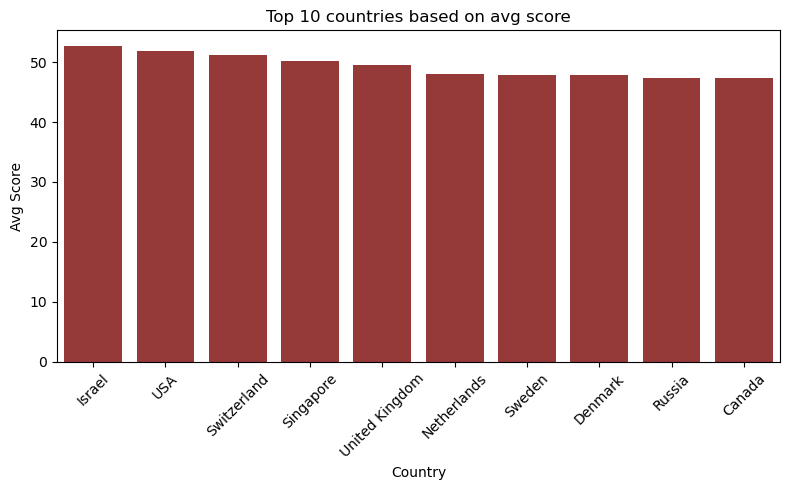

In [92]:
top_10_avg_score_by_country = df.groupby('country')['score'].mean().sort_values(ascending = False).reset_index(name = 'avg_score').head(10)
top_10_avg_score_by_country

plt.figure(figsize = (8,5))
sns.barplot(data = top_10_avg_score_by_country, x = 'country', y = 'avg_score', color = 'brown')
plt.title("Top 10 countries based on avg score")
plt.xlabel("Country")
plt.ylabel("Avg Score")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## 2: Score vs. World Rank
## Task: Scatter plot with score on the y-axis and world_rank on the x-axis.

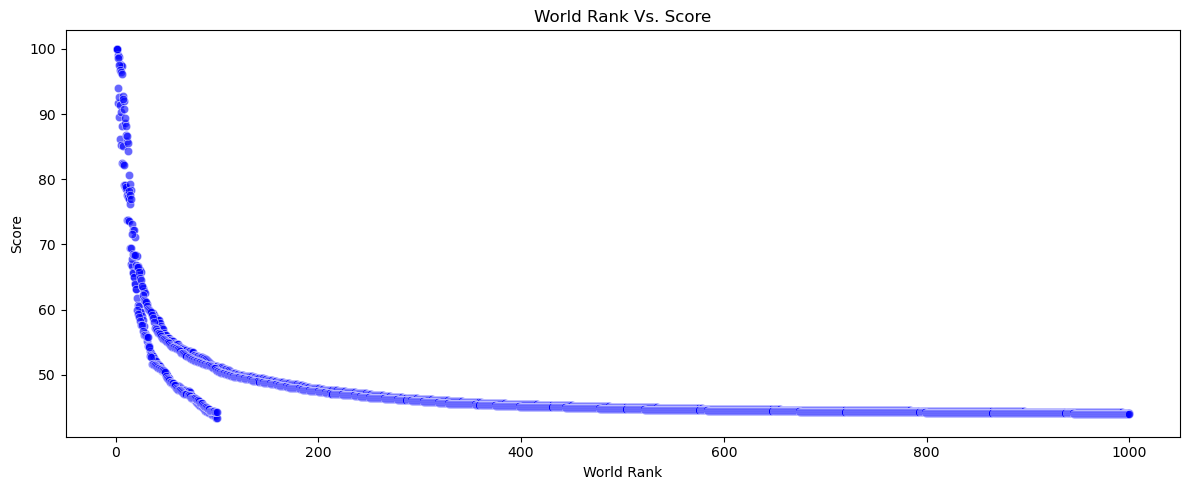

In [109]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = 'world_rank', y = 'score', color = 'blue', alpha=0.6)
plt.title("World Rank Vs. Score")
plt.xlabel("World Rank")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

## 3: Correlation Heatmap
## Task: Create a heatmap for numeric columns (quality_of_education, alumni_employment, citations, score, etc.)

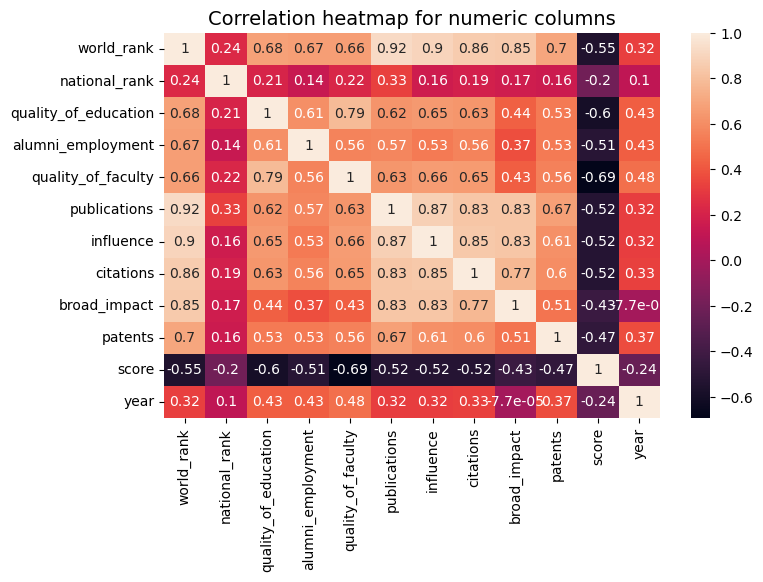

In [118]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title("Correlation heatmap for numeric columns", fontsize=14)
plt.show()

# 📈 EDA 

## 1: Performance Over Time
## Task: Use the year column to analyze how the average university score has changed from year to year.

In [129]:
avg_score_by_year = df.groupby('year')['score'].mean().sort_values(ascending = False).reset_index(name = 'avg_score')
avg_score_by_year

,year,avg_score
0,2013,55.27120
1,2012,54.94090
2,2014,47.27141
3,2015,46.86385


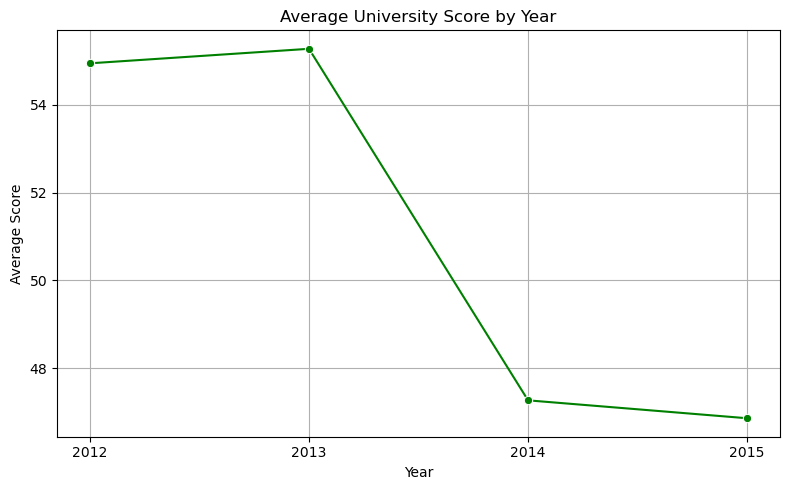

In [137]:
avg_score_by_year['year'] = avg_score_by_year['year'].astype(int)
plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_score_by_year.sort_values('year'), x='year', y='avg_score', marker='o', color='green')
plt.title("Average University Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.xticks(ticks=avg_score_by_year['year'].unique())  
plt.grid(True)
plt.tight_layout()
plt.show()


## 2: Top Institutions Analysis
## Task: Identify institutions that consistently appear in the top 10 across multiple years. Plot their rank or score trend over time.

In [144]:
top_10_each_year = df[df['world_rank'] <= 10]
top_institutions = top_10_each_year['institution'].value_counts()
consistent_top_institutions = top_institutions[top_institutions > 1].index.tolist()
consistent_top_institutions

['Harvard University',
 'Massachusetts Institute of Technology',
 'Stanford University',
 'University of Cambridge',
 'Princeton University',
 'University of Oxford',
 'Columbia University',
 'University of California, Berkeley',
 'Yale University',
 'University of Chicago']

In [150]:
consistent_df = df[(df['institution'].isin(consistent_top_institutions)) & (df['world_rank'] <= 10)]

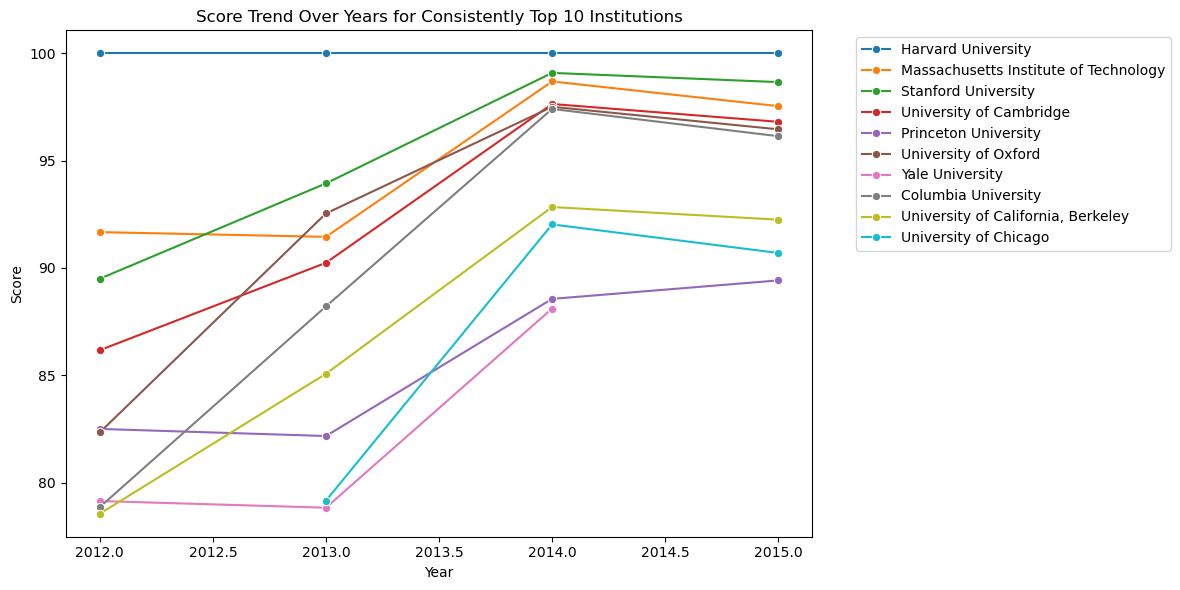

In [152]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=consistent_df, x='year', y='score', hue='institution', marker='o')
plt.title("Score Trend Over Years for Consistently Top 10 Institutions")
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 3: Score Distribution by Country
## Task: Boxplot of score grouped by country (for top 5 most-represented countries).

In [165]:
top_5_country = df['country'].value_counts().sort_values(ascending = False).head(5).index.to_list()
top_5_country_df = df[df['country'].isin(top_5_country)]


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,rank_band
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012,Top 100
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012,Top 100
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012,Top 100
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012,Top 100
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012,Top 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,984,Zhejiang University of Technology,China,79,367,567,218,858,991,812,958.0000,672,44.04,2015,Top 1000
2189,990,Henan Normal University,China,80,367,567,218,959,991,812,958.0000,871,44.04,2015,Top 1000
2190,991,Xidian University,China,81,367,542,218,830,974,812,984.0000,434,44.03,2015,Top 1000
2192,993,Southwest Jiaotong University,China,82,367,327,218,937,962,812,998.0000,861,44.03,2015,Top 1000


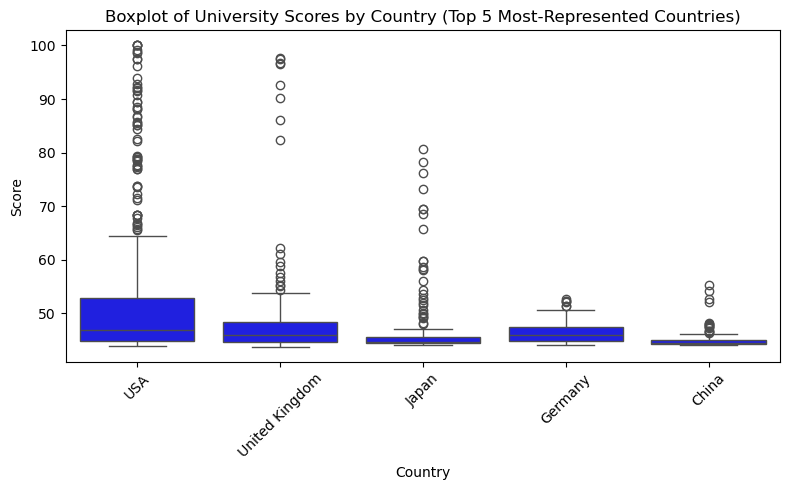

In [177]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=top_5_country_df, x='country', y='score', color = 'blue')
plt.title("Boxplot of University Scores by Country (Top 5 Most-Represented Countries)")
plt.xlabel("Country")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 📐 Statistics

## 1: Correlation Coefficients
## Task: Compute Pearson correlation between:
* citations and score
* alumni_employment and score

In [192]:
corr_citation_score = df['citations'].corr(df['score'], method = 'pearson')
corr_alumni_score = df['alumni_employment'].corr(df['score'], method = 'pearson')

print("Pearson Correlation (Citations vs Score):", round(corr_citation_score,4))
print("Pearson Correlation (Alumni Employment vs Score):", round(corr_alumni_score,4))

Pearson Correlation (Citations vs Score): -0.5224
Pearson Correlation (Alumni Employment vs Score): -0.5104


## 2: Descriptive Stats
## Task: For key columns (score, citations, publications), compute:
* Mean
* Median
* Standard Deviation
* Skewness
* Kurtosis

In [197]:
print(f"Mean of score: {round(df['score'].mean(),4)}")
print(f"Median of score: {round(df['score'].median(),4)}")
print(f"Std. deviation of score: {round(df['score'].std(),4)}")
print(f"Skewness of score: {round(df['score'].skew(),4)}")
print(f"Kurtosis of score: {round(df['score'].kurt(),4)}")

Mean of score: 47.7984
Median of score: 45.1
Std. deviation of score: 7.7608
Skewness of score: 4.1849
Kurtosis of score: 19.8355


In [201]:
print(f"Mean of citations: {round(df['citations'].mean(),4)}")
print(f"Median of citations: {round(df['citations'].median(),4)}")
print(f"Std. deviation of citations: {round(df['citations'].std(),4)}")
print(f"Skewness of citations: {round(df['citations'].skew(),4)}")
print(f"Kurtosis of citations: {round(df['citations'].kurt(),4)}")

Mean of citations: 413.4173
Median of citations: 406.0
Std. deviation of citations: 264.3665
Skewness of citations: 0.0634
Kurtosis of citations: -1.2738


In [ ]:
print(f"Mean of citations: {round(df['citations'].mean(),4)}")
print(f"Median of citations: {round(df['citations'].median(),4)}")
print(f"Std. deviation of citations: {round(df['citations'].std(),4)}")
print(f"Skewness of citations: {round(df['citations'].skew(),4)}")
print(f"Kurtosis of citations: {round(df['citations'].kurt(),4)}")